In [1]:
# Install a pip package in the current Jupyter kernel

import dlib, cv2, os
from imutils import face_utils
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image

2021-11-14 19:13:00.332648: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-14 19:13:00.332670: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
detector = dlib.cnn_face_detection_model_v1('/home/data/data/kodeiri/ML_project/dogHeadDetector.dat')
predictor = dlib.shape_predictor('/home/data/data/kodeiri/ML_project/landmarkDetector.dat')

In [3]:
def Face_detector(img):
    img_in = img

    img_in = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB)
    # img = cv2.resize(img, dsize=None, fx=0.5, fy=0.5)

    
    gray = cv2.cvtColor(img_in, cv2.COLOR_BGR2GRAY)
    th, threshed = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV) 

    cnts = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
    cnt = sorted(cnts, key=cv2.contourArea)[-1]

    x,y,w,h = cv2.boundingRect(cnt)
    dst = img_in[y:y+h, x:x+w]

    plt.imshow(dst)

    dets = detector(img_in, upsample_num_times=1)

    #print(dets)

    img_result = img_in.copy()

    for i, d in enumerate(dets):
       # print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {}".format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))

        x1, y1 = d.rect.left(), d.rect.top()
 
        x2, y2 = d.rect.right(), d.rect.bottom()
        if y1 < 0:
            y1 = 0
        if x1 < 0:
            x1 = 0
        if x2 < 0:
            x2 = 0
        if y2 < 0:
            y2 = 0 

        #cv2.rectangle(img_result, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=(255,0,0), lineType=cv2.LINE_AA)
        
    shapes = []

    

    for i, d in enumerate(dets):
        shape = predictor(img_in, d.rect)
        shape = face_utils.shape_to_np(shape)
        # for i, p in enumerate(shape):
        shapes.append(shape)
            #cv2.putText(img_result, str(i), tuple(p), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1, cv2.LINE_AA)
    # cv2.circle(img_result, center=shapes[4], radius=0.5, color=(0,0,255), thickness=-1, lineType=cv2.LINE_AA)
    # img_result = img_result[y1:y2,x1:x2]
    # print(img_result.shape)
    # img_result = cv2.resize(img_result,(100,100))
    #img_out = cv2.cvtColor(img_result, cv2.COLOR_RGB2BGR)
    #cv2.imwrite('img/%s_out%s' % (filename, ext), img_out)
    #plt.figure(figsize=(16, 16))
    # plt.imshow(img_result)
    try:
        return img_result, x1, x2, y1, y2
    except:
        return img_result

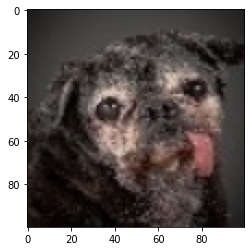

In [4]:
# img_path = "/home/kodeiri/data/data/ML_project/dogs datasets/Experts_train_evalYoung/Akita\ 1-2\ M.jpg "
dataset_path = "/home/data/data/kodeiri/ML_project/test_photos_downloaded/"
modified_path = "/home/data/data/kodeiri/ML_project/test_photos_downloaded/"

for folder in os.listdir(dataset_path):
    for files in os.listdir(f'{dataset_path}{folder}'):
        img = cv2.imread(f'{dataset_path}{folder}/{files}')
        try:
            img_res, x1, x2, y1, y2 = Face_detector(img)
            img_res = img[y1:y2,x1:x2]
            cv2.imwrite(f'{modified_path}{folder}/{files}', img_res)
        except:
            print ('Error ocurred!')
        # plt.imshow(img)
        # plt.show()
        # plt.imshow(img_res)
        # plt.show()
        